In [2]:
import pandas as pd 

data = pd.read_csv("./data/Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
# Seeing unique values and converting it to categorical variables and Gender column is an object data type
data.Gender.nunique()

2

In [5]:
# Replacing categorical values for numeric values
data['Gender'] = data['Gender'].replace({'Male': 0, 'Female': 1}) 
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


In [6]:
# fitting the values from dataset to the variable
X = data[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
wss_values = [] # Creating an empty list to store the WSS values for each number of clusters

In [7]:
# Looping over a range of clusters and calculating the WSS for each number of clusters
from sklearn.cluster import KMeans

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k) # Initializing model 
    kmeans.fit(X) # Fitting model to the variables used for identifying patterns for clustering
    wss_values.append(kmeans.inertia_) # Storing values to the list created on the code cell above

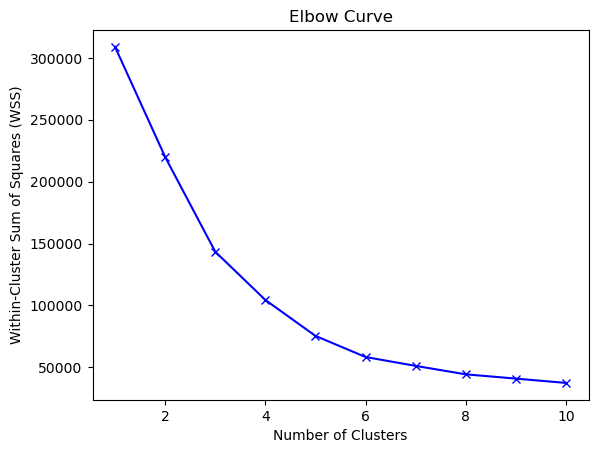

In [8]:
# Plot the WSS values against the number of clusters

import matplotlib.pyplot as plt

plt.plot(range(1, 11), wss_values, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WSS)')
plt.title('Elbow Curve')
plt.show()

The curve is flattenning around 4 so 4 is the optimal number of clusters

In [9]:
# Initializing the model again with a defined number of clusters
kmeans = KMeans(n_clusters=4) 

# Fitting the model to the data
kmeans.fit(X) 

# Adding the cluster labels to the dataframe 
data['Cluster'] = kmeans.labels_ 

In [10]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,0,19,15,39,1
1,2,0,21,15,81,1
2,3,1,20,16,6,3
3,4,1,23,16,77,1
4,5,1,31,17,40,3
...,...,...,...,...,...,...
195,196,1,35,120,79,2
196,197,1,45,126,28,0
197,198,0,32,126,74,2
198,199,0,32,137,18,0


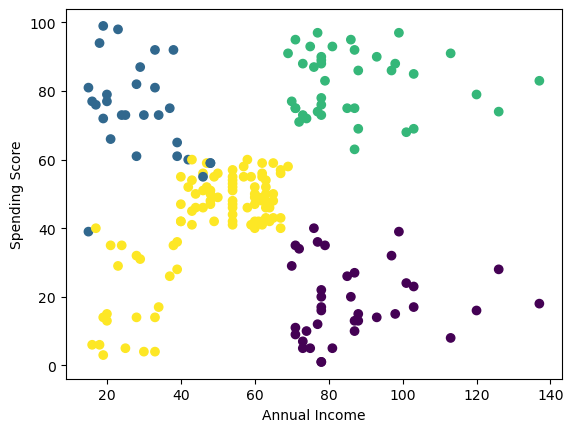

In [11]:
# Visualizing clusters by comparing Spending Score and Annual Income
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=data['Cluster'])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()